# PHASE 1

## Import Libraries & Load Data

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set environmental variables
pd.set_option('display.max_rows', 20)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#actual data import into pandas data frame
raw = pd.read_csv('Breast-Cancer-Wisconsin.csv')

#### Original Data Source & Field Descriptions
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

## Data Wrangling

In [4]:
raw.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#Address missing values
raw.replace('?', np.NaN, inplace=True)

In [6]:
raw.dtypes

Scn       int64
A2        int64
A3        int64
A4        int64
A5        int64
A6        int64
A7       object
A8        int64
A9        int64
A10       int64
CLASS     int64
dtype: object

In [7]:
raw.A7 = pd.to_numeric(raw.A7, errors='coerce')

In [8]:
raw.A7.isna().sum()

16

In [9]:
raw['A7'].fillna(raw['A7'].mean(), inplace=True)

In [10]:
print(raw.isna().sum())

Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
CLASS    0
dtype: int64


In [11]:
bcd = raw.rename(columns={'Scn': 'id', 'A2':'clump_thick', 'A3':'uni_cell_size', 'A4':'uni_cell_shape', 'A5':'marg_adhesion', 'A6':'single_cell_size', 
                          'A7':'bare_nuc', 'A8':'bland_chromatin','A9':'normal_nuc', 'A10':'mitoses'})

## Exploratory Data Analysis

#### Review Summary Statistics

In [12]:
bcd.describe()

,id,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
#Display varinace of each feature
bcd.iloc[:, 1:10].var()

clump_thick          7.928395
uni_cell_size        9.311403
uni_cell_shape       8.832265
marg_adhesion        8.153191
single_cell_size     4.903124
bare_nuc            12.973335
bland_chromatin      5.945620
normal_nuc           9.324680
mitoses              2.941492
dtype: float64

In [14]:
bcd.iloc[:, 1:10].corr()

,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses
clump_thick,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034
uni_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693
uni_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911
marg_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633
single_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101
bare_nuc,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169
normal_nuc,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000


**Pairs with Highest correlations are:**
1. uniform_cellsize & uniform_cellshape (.91)
2. uniform_cellsize & bland_chromatin (.76)
3. uniform_cellsize & epithelial_cellsize (.75)

#### Review Duplicates

In [15]:
bcd.shape

(699, 11)

In [16]:
print('Unique Row Count:', bcd['id'].nunique())

Unique Row Count: 645


There are 645 unique rows. The shape told us there are 699 rows. That means there are duplicate rows.

In [17]:
bcd['duplicate'] = bcd.duplicated(subset='id', keep=False) #Add column to ID duplicate rows

In [18]:
bcd[bcd['duplicate'] == True].sort_values('id')

,id,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses,CLASS,duplicate
267,320675,3,3,5,2,3,10.0,7,1,1,4,True
272,320675,3,3,5,2,3,10.0,7,1,1,4,True
575,385103,5,1,2,1,2,1.0,3,1,1,2,True
269,385103,1,1,1,1,2,1.0,3,1,1,2,True
271,411453,5,1,1,1,2,1.0,3,1,1,2,True
607,411453,1,1,1,1,2,1.0,1,1,1,2,True
684,466906,1,1,1,1,2,1.0,1,1,1,2,True
683,466906,1,1,1,1,2,1.0,1,1,1,2,True
371,493452,1,1,3,1,2,1.0,1,1,1,2,True
372,493452,4,1,2,1,2,1.0,2,1,1,2,True


The duplicates in the dataset may be due to the same sample being measured at different points in time. Possible courses of action include:

1. Keep all observations/Don't adjust the data
2. Drop duplicate observations where all values are equal (e.g. Scn == '320675')
3. Drop all observations where duplicate==True
4. Drop duplicates except for the first occurrence
5. Drop duplicates except for the last occurrence

Current recommendation is #1.

#### Plots for Further Data Exploration

In [19]:
bcd2 = bcd.iloc[:, 1:10]

In [20]:
bcd2.head(n=5)

,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


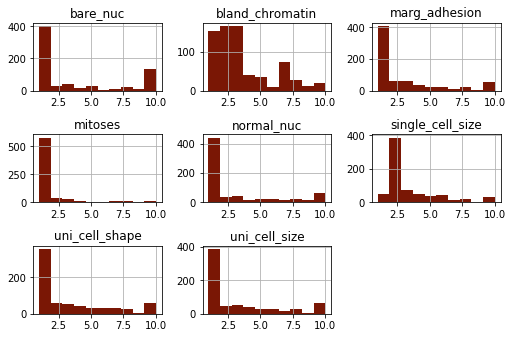

In [21]:
hist = bcd2.iloc[:,1:10].hist(
    grid = True, 
    bins = 10, 
    color = '#7A1705',
    alpha = 1.0
)

plt.tight_layout(rect=(0,0,1.2,1.2))

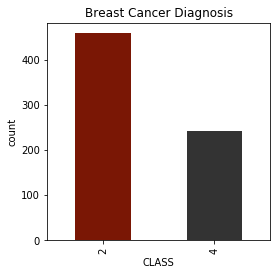

In [22]:
bar = bcd.groupby(['CLASS'])['id'].count().plot.bar(figsize=(4,4),color=('#7A1705','#333333'),title='Breast Cancer Diagnosis')
__ = plt.ylabel('count')

##### Editing Values for Chart Labels

In [23]:
bcd['diagnosis'] = np.where(bcd['CLASS']==2, 'Benign', 'Malignant')

In [24]:
benign = bcd.loc[bcd['diagnosis'] == 'Benign']
malignant = bcd.loc[bcd['diagnosis'] == 'Malignant']

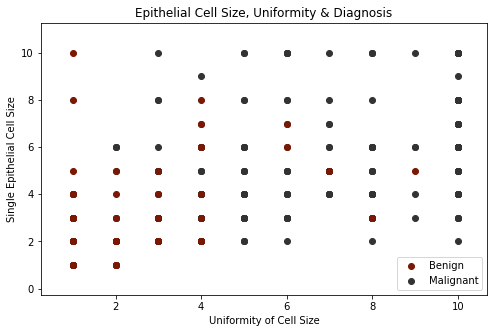

In [25]:
#Define color dictionary & Figure size
color_dict = ['#7A1705', '#333333']
_ = plt.figure(figsize=(8,5))

#Create plot
scatter_malig = plt.scatter(malignant['uni_cell_size'], malignant['single_cell_size'], color=color_dict[1])
scatter_benign = plt.scatter(benign['uni_cell_size'], benign['single_cell_size'], color=color_dict[0])

#Define plot legend
_ = plt.legend((scatter_benign, scatter_malig),('Benign', 'Malignant'))

#Refine plot options
_ = plt.title('Epithelial Cell Size, Uniformity & Diagnosis')
_ = plt.xlabel('Uniformity of Cell Size')
_ = plt.ylabel('Single Epithelial Cell Size')
_ = plt.margins(x=0.075, y=0.125)

> Summarize by reporting which values might need standardization in the future (too much variation) and any other observations that you may discover as a Data Scientist.

- Columns A7, A3, A9 all have standard deviation greater than 3. A standard normal distribution has sd of 1. Probably these columns at least could use standardization.**

- Beyond statistics, I think there needs to a level of subject matter of expertise to make this decision. data scientist differentiate themselves from software developers and data engineers by having domain knowledge they marry with statistics and data engineering**

# PHASE II

## Clustering Using KMeans - No Standardization

#### Create & Fit Model

In [26]:
#Import libraries
from sklearn.cluster import KMeans

In [27]:
#Create and fit model
model = KMeans(n_clusters=4).fit(bcd.iloc[:, 1:10])

In [28]:
#Calculate cluster label create new dataset
labels = model.labels_
kmeans_data = bcd
kmeans_data['cluster'] = labels
kmeans_data.head()

,id,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses,CLASS,duplicate,diagnosis,cluster
0,1000025,5,1,1,1,2,1.0,3,1,1,2,False,Benign,1
1,1002945,5,4,4,5,7,10.0,3,2,1,2,False,Benign,0
2,1015425,3,1,1,1,2,2.0,3,1,1,2,False,Benign,1
3,1016277,6,8,8,1,3,4.0,3,7,1,2,False,Benign,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2,True,Benign,1


#### Evaluate Cluster Performance

In [29]:
#Centroids
centroids_array = model.cluster_centers_
centroids_df = pd.DataFrame(centroids_array
                            ,columns = kmeans_data.iloc[:, 1:10].columns
                           )
centroids_df

,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses
0,7.270833,4.854167,5.031250,4.781250,4.083333,9.266090,5.260417,3.760417,1.656250
1,2.944934,1.244493,1.365639,1.292952,2.039648,1.351401,2.061674,1.200441,1.077093
2,7.420290,7.086957,6.739130,4.289855,5.623188,3.443971,5.391304,6.942029,2.318841
3,6.762500,8.387500,8.425000,7.750000,6.775000,9.212500,7.375000,7.737500,3.787500


In [30]:
#Crosstabulation
pd.crosstab(kmeans_data['cluster'], kmeans_data['diagnosis'])

diagnosis,Benign,Malignant
cluster,,
0,7,89
1,444,10
2,7,62
3,0,80


In [31]:
#Inertia
print(model.inertia_)

15023.71621220535


#### Find the optimal number of clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

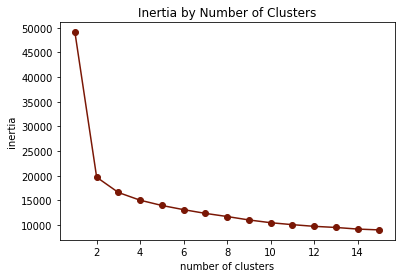

In [32]:
inertiaRange = range(1,16)
inertiaList = []
for x in inertiaRange:
    model = KMeans(n_clusters=x)
    model.fit(bcd.iloc[:, 1:10].values)
    inertiaList.append(model.inertia_)
#plot range and inertia
ax = plt.plot(inertiaRange,inertiaList, '-o', color = '#7A1705')
_ = plt.xlabel('number of clusters')
_ = plt.ylabel('inertia')
_ = plt.title('Inertia by Number of Clusters')

3 seems like optimal number of clusters

#### Revisit Variance

In [33]:
stdev = raw.iloc[:, 1:10].std()
stdev.sort_values(ascending=True, inplace=True)
print(stdev)

A10    1.715078
A6     2.214300
A8     2.438364
A2     2.815741
A5     2.855379
A4     2.971913
A3     3.051459
A9     3.053634
A7     3.601852
dtype: float64


##### Plot 1 - Line

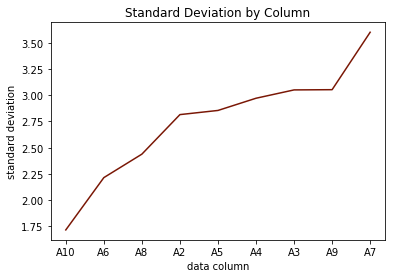

In [34]:
#dataframe.std() will run only on numeric columns, i.e. not the labels
ax2 = plt.plot(stdev.index,stdev.values, color = '#7A1705')
_ = plt.xlabel('data column')
_ = plt.ylabel('standard deviation')
_ = plt.title('Standard Deviation by Column')

##### Plot 2 - Bar

In [35]:
#Create arrays to use in plot
x_pos = np.arange(len(kmeans_data.iloc[0, 1:10]))
x_vars = kmeans_data.iloc[:, 1:10].columns
mean = np.mean(kmeans_data.iloc[:, 1:10], axis=0)
std = np.std(kmeans_data.iloc[:, 1:10], axis=0)

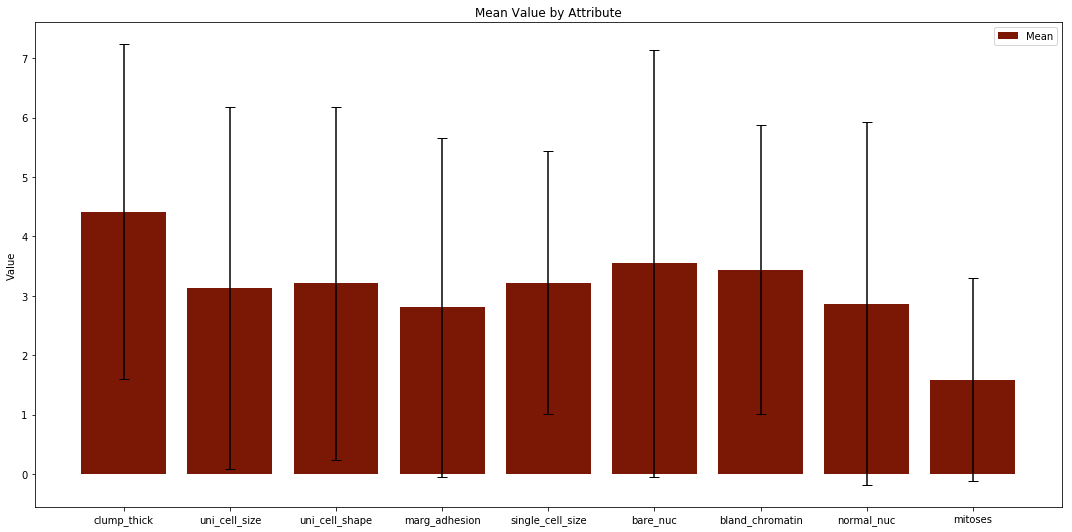

In [36]:
#Create plots
fig, ax = plt.subplots(figsize=(15,7.5))
bar = ax.bar(x_pos, mean, yerr=std, alpha=1.00, color = '#7A1705', capsize=5)
_ = ax.set_title('Mean Value by Attribute')
_ = ax.set_xticks(x_pos)
_ = ax.set_xticklabels(x_vars)
_ = ax.set_ylabel('Value')
_ = ax.legend(['Mean'])
plt.tight_layout()
plt.show()

Many of the attributes have high variance. This is especially true for Marginal Adhesion, Bare Nuclei, Normal Nucleoli, and Mitosis, as the standard deviation exceeds the mean.
Additionally, other attributes have standard deviations which are very close to the mean (Uniformity of Cellsize and Uniformity of Cell Shape) 

## Clustering Using KMeans - With Standardization

#### Create & Fit Pipeline

In [37]:
#Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [38]:
#Create and fit model
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(kmeans_data.iloc[:, 1:10].values)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [39]:
#Calculate labels & append to dataset
labels = pipeline.predict(kmeans_data.iloc[:, 1:10])
kmeans_data_norm = kmeans_data
kmeans_data_norm['cluster'] = labels
kmeans_data_norm.head()

,id,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses,CLASS,duplicate,diagnosis,cluster
0,1000025,5,1,1,1,2,1.0,3,1,1,2,False,Benign,1
1,1002945,5,4,4,5,7,10.0,3,2,1,2,False,Benign,0
2,1015425,3,1,1,1,2,2.0,3,1,1,2,False,Benign,1
3,1016277,6,8,8,1,3,4.0,3,7,1,2,False,Benign,0
4,1017023,4,1,1,3,2,1.0,3,1,1,2,True,Benign,1


#### Evaluate Cluster Performance

In [40]:
#Crosstabulation
pd.crosstab(kmeans_data_norm['cluster'], kmeans_data_norm['diagnosis'])

diagnosis,Benign,Malignant
cluster,,
0,13,196
1,445,11
2,0,34


In [41]:
#Inertia
pipeline.named_steps['kmeans'].inertia_

2297.266479332806

In [42]:
#Print centroids
centroids_array = pipeline.named_steps['kmeans'].cluster_centers_
centroids_df = pd.DataFrame(centroids_array
                            ,columns = kmeans_data_norm.iloc[:, 1:10].columns
                           )
centroids_df

,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses
0,0.943244,1.060561,1.057936,0.879294,0.860298,1.129076,1.008351,0.929525,0.032978
1,-0.519453,-0.617289,-0.617027,-0.521036,-0.533704,-0.604305,-0.565767,-0.542833,-0.299127
2,1.168608,1.759606,1.772232,1.582941,1.869612,1.164301,1.389532,1.566504,3.809103


# PHASE 3

## Clustering Using KMeans - Final Iteration

#### Create & Fit Pipeline

In [43]:
kmeans = KMeans(n_clusters=2,n_init=20,max_iter=500)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(bcd.iloc[:, 1:10].values)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

#### Evaluate Cluster Performance

In [44]:
#Calculate labels & append to dataset
labels = kmeans.labels_

In [45]:
#Append labels to dataset
bcd2 = bcd
bcd2['kmeans_labels'] = labels

In [46]:
#Change label values
bcd2['kmeans_labels'] = bcd2['kmeans_labels'].replace(0, 2)
bcd2['kmeans_labels'] = bcd2['kmeans_labels'].replace(1, 4)
bcd2.head(n=15)

,id,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses,CLASS,duplicate,diagnosis,cluster,kmeans_labels
0,1000025,5,1,1,1,2,1.0,3,1,1,2,False,Benign,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2,False,Benign,0,4
2,1015425,3,1,1,1,2,2.0,3,1,1,2,False,Benign,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2,False,Benign,0,4
4,1017023,4,1,1,3,2,1.0,3,1,1,2,True,Benign,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4,False,Malignant,0,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2,False,Benign,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2,False,Benign,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2,True,Benign,1,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2,True,Benign,1,2


In [47]:
#Crosstabulation
pd.crosstab(bcd2['kmeans_labels'], bcd2['diagnosis'])

diagnosis,Benign,Malignant
kmeans_labels,,
2,446,19
4,12,222


In [48]:
#Inertia
pipeline.named_steps['kmeans'].inertia_

2800.2124682101976

In [49]:
#Define error rate function
def error_rate(predict_class, actual_class):
    
    error_malig    = sum((predict_class == 4) & (actual_class == 2))
    predict_benign = sum((predict_class == 2))
    b_error_rt     = round((error_malig / predict_benign), 4)
    
    error_benign   = sum((predict_class == 2) & (actual_class == 4))
    predict_malig  = sum((predict_class == 4))
    m_error_rt     = round((error_benign / predict_malig), 4)
    
    error_total    = sum(predict_class != actual_class)
    total_obs      = len(predict_class)
    total_error_rt = round((error_total / total_obs), 4)
    
    print('Error Rate for Benign:', b_error_rt
         ,'\nError Rate for Malignant:', m_error_rt
         ,'\nTotal Error Rate:', total_error_rt)

In [50]:
#Call error rate function
error_rate(bcd2['kmeans_labels'], bcd2['CLASS'])

Error Rate for Benign: 0.0258 
Error Rate for Malignant: 0.0812 
Total Error Rate: 0.0443


#### Report Statement

The total error rate of the final clustering in Phase III seems low: less than 3% for benign, near 8% for malignant, and around 4.5% overall. However, this approach to generating an error rate is somewhat oversimplified, as it is dependent upon using two and only two clusters. Additionally, the values change whenever the code is executed, as the clusters are allocated differently. Hence in some iterations, the error rate will be reported incorrectly, as the cluster labels will not always receive the same values.

We also postulate that the dataset may be too small of a sample size for this topic, which requires significant accuracy. There is also significant variance in some variables, so having a larger sample size may help narrow the overall confidence interval.

Finally, while comparing the inertia of Phase III to Phase II, we see that using the KMeans algorithm with two clusters generates the lowest inertia (2300 in Phase II vs. 2800 in Phase III). Another way that performance could be compared across both phases would be to create training and testing sets, and compare the performance on out of sample data.